In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ptitprince as pt
import seaborn as sns
import xarray as xr

import tams

In [2]:
warnings.filterwarnings("ignore", message="Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0.")

## Load data (Tb must be named 'ctt' and precip 'pr')

In [3]:
ds = tams.load_example_mpas().rename({"tb": "ctt", "precip": "pr"}).isel(time=slice(1, None))
ds

<xarray.Dataset>
Dimensions:  (time: 126, lon: 341, lat: 180)
Coordinates:
  * time     (time) datetime64[ns] 2006-09-08T13:00:00 ... 2006-09-13T18:00:00
  * lon      (lon) float64 85.0 85.25 85.5 85.75 ... 169.2 169.5 169.8 170.0
  * lat      (lat) float64 -4.875 -4.625 -4.375 -4.125 ... 39.38 39.62 39.88
Data variables:
    ctt      (time, lat, lon) float32 266.8 266.9 267.0 ... 266.0 265.9 265.7
    pr       (time, lat, lon) float32 ...

## Run TAMS

In [4]:
%%time

ce, mcs, mcs_summary = tams.run(ds, parallel=True)

Starting `identify`


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done   2 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-2)]: Done   7 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-2)]: Done  12 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-2)]: Done  19 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-2)]: Done  26 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-2)]: Done  35 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-2)]: Done  55 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-2)]: Done  66 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-2)]: Done  79 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-2)]: Done  92 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-2)]: Done 107 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-2)]: Done 126 out of 126 | elapsed:   28.9s finished


Starting `track`
Starting `classify`
Starting statistics calculations
Starting CE aggregation (into MCS time series)
Starting gridded data aggregation
Computing stats for MCS summary dataset
CPU times: user 1min 18s, sys: 2.19 s, total: 1min 21s
Wall time: 1min 54s


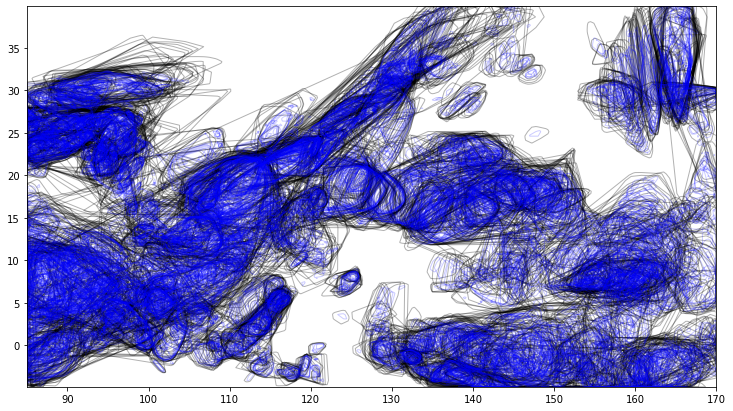

In [26]:
_, ax = plt.subplots(figsize=(15, 7))
ce.plot(fc="none", alpha=0.3, ax=ax)
ce.cs219.plot(fc="none", ec="b", alpha=0.2, ax=ax)
ax.autoscale(axis="both", tight=True)

In [5]:
ce

,cs235,area_km2,area219_km2,cs219,time,mcs_id,mcs_class
0,"POLYGON ((167.50000 9.49188, 167.75000 9.58423...",25634.1184,11798.035271,"MULTIPOLYGON (((167.50000 9.61125, 167.53439 9...",2006-09-08 13:00:00,0,DSL
1,"POLYGON ((152.50000 8.79886, 152.61238 8.87500...",79372.537834,48340.476814,"MULTIPOLYGON (((152.75000 10.37642, 153.00000 ...",2006-09-08 13:00:00,1,DSL
2,"POLYGON ((148.75000 8.23715, 149.00000 8.27821...",14036.478097,7223.353767,"MULTIPOLYGON (((148.75000 8.34082, 148.99758 8...",2006-09-08 13:00:00,2,DSL
3,"POLYGON ((147.25000 7.01224, 147.75000 7.01643...",22263.09014,6159.967885,"MULTIPOLYGON (((147.75000 7.19960, 148.00000 7...",2006-09-08 13:00:00,3,DSL
4,"POLYGON ((138.25000 15.00363, 138.50000 15.050...",10596.159009,5433.912228,"MULTIPOLYGON (((138.25000 15.10322, 138.33471 ...",2006-09-08 13:00:00,4,DSL
...,...,...,...,...,...,...,...
2939,"POLYGON ((93.75000 -0.27679, 95.50000 -0.19343...",184089.516132,51230.99577,"MULTIPOLYGON (((97.25000 1.13796, 97.25000 1.1...",2006-09-13 18:00:00,468,CCC
2940,"POLYGON ((96.00000 17.66851, 97.00000 18.08830...",437130.281546,177430.509392,"MULTIPOLYGON (((97.00000 18.63751, 97.25000 18...",2006-09-13 18:00:00,475,CCC
2941,"POLYGON ((88.75000 -0.76241, 89.00000 -0.69936...",2361151.160382,784762.303559,"MULTIPOLYGON (((101.25000 3.55918, 101.45133 3...",2006-09-13 18:00:00,468,CCC
2942,"POLYGON ((89.25000 23.32847, 90.00000 23.37754...",44352.678119,18672.884749,"MULTIPOLYGON (((90.25000 24.66936, 90.50000 24...",2006-09-13 18:00:00,492,DSL


In [6]:
mcs

,time,cs235,cs219,nce,area_km2,area219_km2,mcs_id,mcs_class,mean_pr,std_pr,npixel,mean_pr219,std_pr219,mean_ctt219,std_ctt219,npixel219
0,2006-09-08 13:00:00,"MULTIPOLYGON (((167.50000 9.49188, 167.75000 9...","MULTIPOLYGON (((167.50000 9.61125, 167.53439 9...",1,25634.1184,11798.035271,0,DSL,2.645099,0.927722,36,3.28087,0.533223,209.896077,4.906273,18
1,2006-09-08 13:00:00,"MULTIPOLYGON (((152.50000 8.79886, 152.61238 8...","MULTIPOLYGON (((152.75000 10.37642, 153.00000 ...",1,79372.537834,48340.476814,1,DSL,1.910169,1.426157,106,2.547689,1.304625,215.991379,16.687454,64
2,2006-09-08 13:00:00,"MULTIPOLYGON (((148.75000 8.23715, 149.00000 8...","MULTIPOLYGON (((148.75000 8.34082, 148.99758 8...",1,14036.478097,7223.353767,2,DSL,2.254962,0.982726,19,2.883151,0.706086,213.163308,4.442413,11
3,2006-09-08 13:00:00,"MULTIPOLYGON (((147.25000 7.01224, 147.75000 7...","MULTIPOLYGON (((147.75000 7.19960, 148.00000 7...",1,22263.09014,6159.967885,3,DSL,2.019073,0.856571,29,2.915771,0.337212,214.483331,2.475573,9
4,2006-09-08 13:00:00,"MULTIPOLYGON (((138.25000 15.00363, 138.50000 ...","MULTIPOLYGON (((138.25000 15.10322, 138.33471 ...",1,10596.159009,5433.912228,4,DSL,1.95028,0.935729,15,2.571446,0.641791,211.823792,5.197963,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2224,2006-09-13 18:00:00,"MULTIPOLYGON (((89.25000 23.32847, 90.00000 23...","MULTIPOLYGON (((90.25000 24.66936, 90.50000 24...",2,44352.678119,18672.884749,492,DSL,0.769126,0.929744,58,1.139177,1.167276,214.908485,5.187773,26
2225,2006-09-13 18:00:00,"MULTIPOLYGON (((167.25000 -1.18670, 167.36879 ...","MULTIPOLYGON (((167.25000 -1.02517, 167.31446 ...",1,12180.232767,6782.827467,493,DSL,1.93025,1.02312,16,2.507225,0.773454,207.36709,5.121576,10
2226,2006-09-13 18:00:00,"MULTIPOLYGON (((131.75000 26.94532, 133.75000 ...","MULTIPOLYGON (((146.75000 37.37475, 146.75136 ...",1,1125370.851496,98949.950385,494,DSL,1.380654,2.63721,1441,3.477585,5.957973,215.580271,5.591693,142
2227,2006-09-13 18:00:00,"MULTIPOLYGON (((132.50000 15.77221, 133.00000 ...","MULTIPOLYGON (((133.00000 18.83913, 133.08697 ...",1,121634.531884,22269.352344,495,DSL,0.499241,0.245934,159,0.690846,0.231352,216.496345,3.544835,33


In [7]:
mcs_summary

,first_time,last_time,duration,mcs_id,mcs_class,mean_mean_pr,mean_mean_pr219,mean_mean_ctt219,mean_std_ctt219,mean_area_km2,mean_area219_km2,first_centroid,last_centroid,distance_km
0,2006-09-08 13:00:00,2006-09-08 13:00:00,0 days 01:00:00,0,DSL,2.645099,3.28087,209.896077,4.906273,25634.1184,11798.035271,POINT (166.99291 10.21816),POINT (166.99291 10.21816),0.0
1,2006-09-08 13:00:00,2006-09-08 13:00:00,0 days 01:00:00,1,DSL,1.910169,2.547689,215.991379,16.687454,79372.537834,48340.476814,POINT (152.90791 10.97758),POINT (152.90791 10.97758),0.0
2,2006-09-08 13:00:00,2006-09-08 13:00:00,0 days 01:00:00,2,DSL,2.254962,2.883151,213.163308,4.442413,14036.478097,7223.353767,POINT (148.77232 8.90816),POINT (148.77232 8.90816),0.0
3,2006-09-08 13:00:00,2006-09-08 13:00:00,0 days 01:00:00,3,DSL,2.019073,2.915771,214.483331,2.475573,22263.09014,6159.967885,POINT (147.51589 7.72076),POINT (147.51589 7.72076),0.0
4,2006-09-08 13:00:00,2006-09-08 13:00:00,0 days 01:00:00,4,DSL,1.95028,2.571446,211.823792,5.197963,10596.159009,5433.912228,POINT (137.91402 15.61447),POINT (137.91402 15.61447),0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,2006-09-13 17:00:00,2006-09-13 18:00:00,0 days 02:00:00,492,DSL,0.650838,1.186534,215.185958,5.496492,50191.299794,14130.368244,POINT (89.88522 24.09291),POINT (89.82623 24.34102),28.389544
493,2006-09-13 18:00:00,2006-09-13 18:00:00,0 days 01:00:00,493,DSL,1.93025,2.507225,207.36709,5.121576,12180.232767,6782.827467,POINT (167.15304 -0.33869),POINT (167.15304 -0.33869),0.0
494,2006-09-13 18:00:00,2006-09-13 18:00:00,0 days 01:00:00,494,DSL,1.380654,3.477585,215.580271,5.591693,1125370.851496,98949.950385,POINT (139.76467 34.42645),POINT (139.76467 34.42645),0.0
495,2006-09-13 18:00:00,2006-09-13 18:00:00,0 days 01:00:00,495,DSL,0.499241,0.690846,216.496345,3.544835,121634.531884,22269.352344,POINT (132.42477 17.50048),POINT (132.42477 17.50048),0.0


## Plots/Visualization

### Plot MCSs Mean Rain Rate Distributions

(0.0, 8.5)

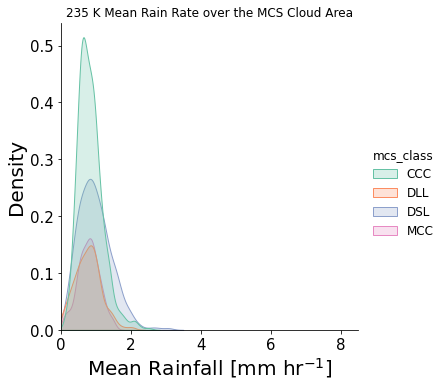

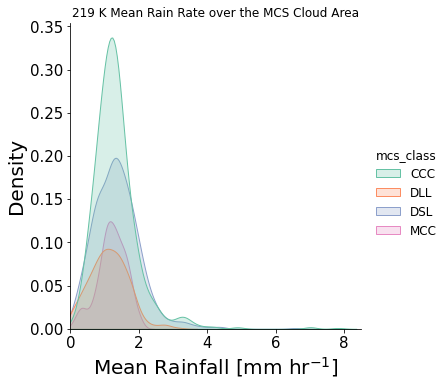

In [8]:
pal = "Set2"

with sns.plotting_context({"legend.fontsize": "large", "legend.title_fontsize": "large"}):
    sns.displot(mcs, x="mean_pr", hue="mcs_class", kind="kde",fill=True, palette=pal)

ax = plt.gca()
ax.set_ylabel("Density", fontsize = 20)
ax.set_xlabel("Mean Rainfall [mm hr$^{-1}$]", fontsize = 20) #average over te MCS cloud area at diffrent times, not the mean rain rate for each CE
ax.tick_params(labelsize=15)
ax.set_title('235 K Mean Rain Rate over the MCS Cloud Area')
ax.set_xlim([0, 8.5])
with sns.plotting_context({"legend.fontsize": "large", "legend.title_fontsize": "large"}):
    sns.displot(mcs, x="mean_pr219", hue="mcs_class", kind="kde",fill=True, palette=pal)

ax = plt.gca()
ax.set_ylabel("Density", fontsize = 20)
ax.set_xlabel("Mean Rainfall [mm hr$^{-1}$]", fontsize = 20) #average over te MCS cloud area at diffrent times, not the mean rain rate for each CE
ax.tick_params(labelsize=15)
ax.set_title('219 K Mean Rain Rate over the MCS Cloud Area')
ax.set_xlim([0, 8.5])

## Number of MCSs by Class 

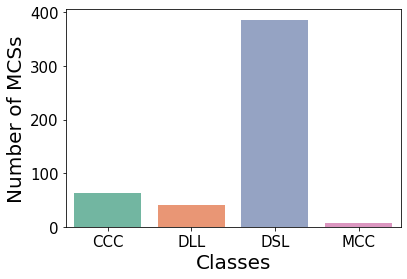

In [9]:
ax = sns.countplot(x="mcs_class", data=mcs_summary, palette=pal)
ax.set_xlabel("Classes", fontsize = 20)
ax.set_ylabel("Number of MCSs", fontsize = 20)
ax.tick_params(labelsize=15)

## Area Distributions 

Text(0, 0.5, 'MCSs Area [km$^2$]')

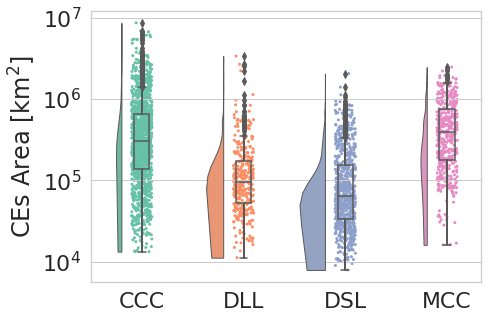

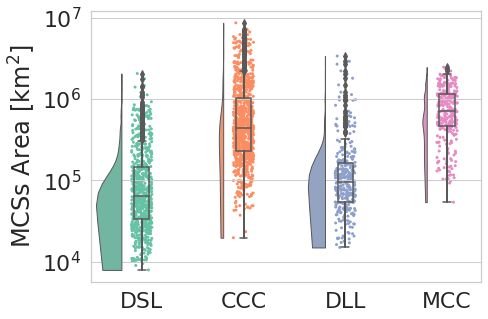

In [37]:
dx = list(ce["mcs_class"]); dy = list(ce["area_km2"]); ort = "v";
sns.set(style="whitegrid",font_scale=2)
f, ax = plt.subplots(figsize=(7, 5))
pt.RainCloud(x=dx,y=dy,data=ce, palette = pal, width_viol = .5, ax = ax, orient = ort, order= ["CCC","DLL","DSL","MCC"])
plt.yscale("log")
plt.ylabel('CEs Area [km$^2$]')

dx = list(mcs["mcs_class"]); dy = list(mcs["area_km2"]); ort = "v";
sns.set(style="whitegrid",font_scale=2)
f, ax = plt.subplots(figsize=(7, 5))
pt.RainCloud(x=dx,y=dy,data=mcs, palette = pal, width_viol = .5, ax = ax, orient = ort)
plt.yscale("log")
plt.ylabel('MCSs Area [km$^2$]')

## MCSs Duration Distributions

In [33]:
c2 = mcs_summary[mcs_summary["mcs_class"].isin(["MCC", "CCC"])].copy()
c3 = mcs_summary[mcs_summary["mcs_class"].isin(["DLL", "DSL"])].copy()

c2.loc[:,"mcs_class"]= c2.mcs_class.astype("string")
c3.loc[:,"mcs_class"]= c3.mcs_class.astype("string")

(1.0, 65.0)

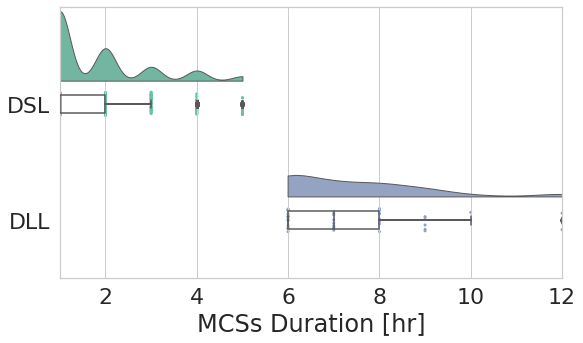

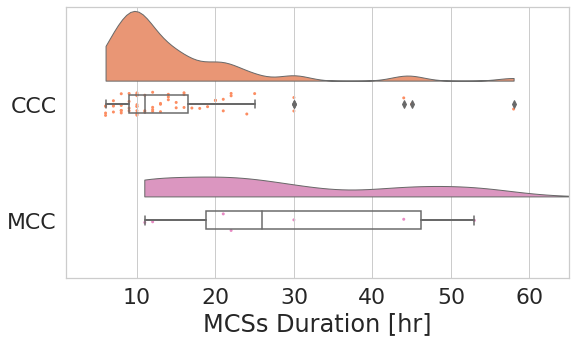

In [45]:
pali= [plt.cm.Set2.colors[0], plt.cm.Set2.colors[2]]

dx = list(c3["mcs_class"]); dy = list(c3.duration.dt.total_seconds()/3600); ort = "h"; 
sns.set(style="whitegrid",font_scale=2)
f, ax = plt.subplots(figsize=(9,5))
pt.RainCloud(x=dx,y=dy,data=c3, palette = pali, width_viol = 1.2, ax = ax, orient = ort)
plt.xlabel('MCSs Duration [hr]')
plt.xlim([1,12])

pali= [plt.cm.Set2.colors[1], plt.cm.Set2.colors[3]]

dx = list(c2["mcs_class"]); dy = list(c2.duration.dt.total_seconds()/3600); ort = "h";
sns.set(style="whitegrid",font_scale=2)
f, ax = plt.subplots(figsize=(9,5))
pt.RainCloud(x=dx,y=dy,data=c2, palette =pali , width_viol = 1.2, ax = ax, orient = ort)
#plt.xscale("log")
plt.xlabel('MCSs Duration [hr]')
plt.xlim([1,65])


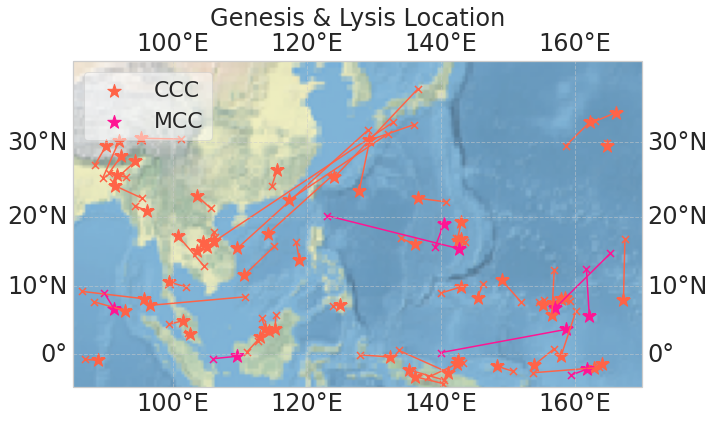

In [53]:
import cartopy.crs as ccrs

lon_min = ds.lon.min()
lon_max = ds.lon.max()
lat_min = ds.lat.min()
lat_max = ds.lat.max()

fig = plt.figure(figsize=(12, 6))

ax = plt.axes(projection=ccrs.Mercator())
ax.stock_img()   
colors = {"CCC": "tomato",  "MCC": "deeppink"}
for class_, g in c2.groupby("mcs_class"):
    color = colors.get(class_,"0.3")
    g.first_centroid.plot(marker="*",ax=ax, transform=ccrs.PlateCarree(), markersize=200, c=color,label=class_,)
    g.last_centroid.plot(marker="x",ax=ax, transform=ccrs.PlateCarree(), markersize=50, c=color)
    ax.plot([g.first_centroid.x, g.last_centroid.x],[g.first_centroid.y, g.last_centroid.y], linestyle='-',transform=ccrs.PlateCarree(),color=color) 
gridlines = ax.gridlines(draw_labels=True,alpha=0.5, linestyle='--')

plt.title('Genesis & Lysis Location')
plt.legend(framealpha=0.5)

extent = [lon_min, lon_max, lat_min, lat_max]
ax.set_extent(extent, crs=ccrs.PlateCarree())

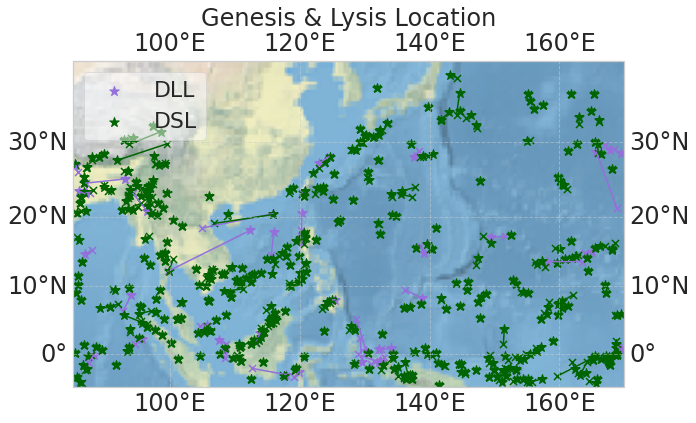

In [55]:
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.Mercator())
ax.stock_img()   
colors = {"DSL": "darkgreen",  "DLL": "mediumpurple"}
for class_, g in c3.groupby("mcs_class"):
    color = colors.get(class_,"0.3")
    g.first_centroid.plot(marker="*",ax=ax, transform=ccrs.PlateCarree(), markersize=100, c=color,label=class_,)
    g.last_centroid.plot(marker="x",ax=ax, transform=ccrs.PlateCarree(), markersize=50, c=color)
    ax.plot([g.first_centroid.x, g.last_centroid.x],[g.first_centroid.y, g.last_centroid.y], linestyle='-',transform=ccrs.PlateCarree(),color=color) 
gridlines = ax.gridlines(draw_labels=True,alpha=0.5, linestyle='--')

plt.title('Genesis & Lysis Location')
plt.legend(framealpha=0.5)

extent = [lon_min, lon_max, lat_min, lat_max]
ax.set_extent(extent, crs=ccrs.PlateCarree())